## Simple Image Analysis Scrips

In [1]:
import numpy as np
import os
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib_scalebar.scalebar import ScaleBar
import scipy.ndimage as ndi
from skimage.filters import rank 
from scipy.signal import butter, lfilter
import scipy.misc as misc
from skimage import exposure
from PIL import Image
import colorcet as cc
from scipy.misc import toimage, imread
import matplotlib.colors as clr
import pandas as pd
import seaborn as sns
import pims
from scipy import stats
import cv2 as cv
import tifffile as tiff

%matplotlib inline

def mean2(x):
    y = np.sum(x) / np.size(x);
    return y

def corr2(a,b):
    a = a - mean2(a)
    b = b - mean2(b)

    r = (a*b).sum() / np.sqrt((a*a).sum() * (b*b).sum());
    return r

plt.rcParams.update({'font.size': 22})

### Z stack intensity profile single image

/anaconda3/lib/python3.6/site-packages/tifffile/tifffile.py:2894: UserWarning: invalid page offset (21172208)
  warnings.warn('invalid page offset (%i)' % offset)


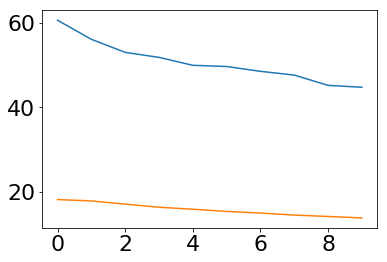

In [106]:
#image file:
imdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Organotypic Slices/20180424_LTPStim/DMSO/20180424_03_HFS/20180424_03_HFS_Series4.tif'

#define channel nos
Protein1_channel_no=1
Protein2_channel_no=2

#read the image and separate channels
Protein1_image = tiff.imread(imdir)[0,:,Protein1_channel_no-1,:,:]
Protein2_image = tiff.imread(imdir)[0,:,Protein2_channel_no-1,:,:]

#calculate mean across stacks
Prot1=np.array(Protein1_image)
Prot1_flattened=Prot1.reshape(Prot1.shape[0],-1)
Prot2=np.array(Protein2_image)
Prot2_flattened=Prot2.reshape(Prot2.shape[0],-1)
Protein1_meanint_across_stacks=np.mean(Prot1_flattened,axis=1)
Protein2_meanint_across_stacks=np.mean(Prot2_flattened,axis=1)

#plot
plt.plot(np.arange(10),Protein1_meanint_across_stacks)
plt.plot(np.arange(10),Protein2_meanint_across_stacks)
plt.show()

### Z stack intensity profile - all stacks within a directory

In [72]:
#image dir1:
imdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Organotypic Slices/20180424_LTPStim/'
imdir2='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Organotypic Slices/20180411and0412_LTPStim_Cy3laserto25percent/'

#image dir2

#define channel nos
Protein1_channel_no=1
Protein2_channel_no=2

#read the image and separate channels
Protein1_image = tiff.imread(imdir)[0,:,Protein1_channel_no-1,:,:]
Protein2_image = tiff.imread(imdir)[0,:,Protein2_channel_no-1,:,:]

(10, 1048576)

### Mean intensity for nd2 files

In [62]:
expdir='/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture/180813_Blockingattempt/TNR/' #master folder
results = {"filename":[],
           "Earlycontroldir":[],
           "Early colour - Mean intensity of spots Normd to ctrls":[],
           "Early colour - Mean intensity Normd to ctrls":[],
           "exp condition":[],
           "earlychannelno":[],"latechannelno":[],"synapsechannelno":[],"Autofluorescencedir":[],
           "Early colour - spots mask":[],
           "Late colour - spots mask":[],
           "Synapse colour - spots mask":[],
           "Early colour - Raw mean intensity":[],
           "Late colour - Raw mean intensity":[],
           "Synapse colour - Raw mean intensity":[],
           "Early colour - Mean intensity of spots":[], #based on spot segmentation mask
           "Late colour - Mean intensity of spots":[], #based on spot segmentation mask
           "Synapse colour - Mean intensity of spots":[]} #based on spot segmentation mask
path = os.path.dirname(expdir)  
outputFolder = os.path.dirname(expdir + "/new/")
filelist = []
for root, _, filenames in os.walk(path):
     for filename in filenames:
         filelist.append(os.path.join(root, filename))
        
for i in range(0,len(filelist)):
    if "TNR" in str(filelist[i]):
        if filelist[i].endswith(".nd2"): #& ("60x" in str(filelist[i]))==True:
            results["filename"].append(filelist[i])
            results["exp condition"].append(filelist[i].split('/')[-2])
            channeldir="/".join(filelist[i].split("/")[:-2])
            results["Earlycontroldir"].append(channeldir+"/ctrl_no_blocking")

In [63]:
results['exp condition']

['ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'ctrl_no_blocking',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_15mins',
 'block_100_30mins',
 'block_100_30mins',
 'block_100_30mins',
 'block_100_30mins',
 'block_100_30mins',
 'block_100_30mins',
 'block_100_30mins',
 'block_100_3

In [64]:
results["Earlycontroldir"]

['/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture/180813_Blockingattempt/TNR/ctrl_no_blocking',
 '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture/180813_Blockingattempt/TNR/ctrl_no_blocking',
 '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture/180813_Blockingattempt/TNR/ctrl_no_blocking',
 '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture/180813_Blockingattempt/TNR/ctrl_no_blocking',
 '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture/180813_Blockingattempt/TNR/ctrl_no_blocking',
 '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture/180813_Blockingattempt/TNR/ctrl_no_blocking',
 '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture/180813_Blockingattempt/TNR/ctrl_no_blocking',
 '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture/180813_Blockingattempt/TNR/ctrl_no_blocking',
 '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture/180813_Blockingattempt/TNR/ctrl_no_blocking',
 '/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture/180813_Blockingattempt/TNR/ctrl_no_b

/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture/180813_Blockingattempt/TNR/block_100_15mins/180813_04_002.nd2
/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture/180813_Blockingattempt/TNR/block_10_30mins/180813_09_001.nd2


/anaconda3/lib/python3.6/site-packages/skimage/filters/rank/generic.py:102: UserWarning: Bitdepth of 12 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)


/Volumes/ukps-all$/user/tdanko/Imaging/1_ECM/Culture/180813_Blockingattempt/TNR/block_100_30mins/180813_06_007.nd2


/anaconda3/lib/python3.6/site-packages/skimage/filters/rank/generic.py:102: UserWarning: Bitdepth of 11 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)


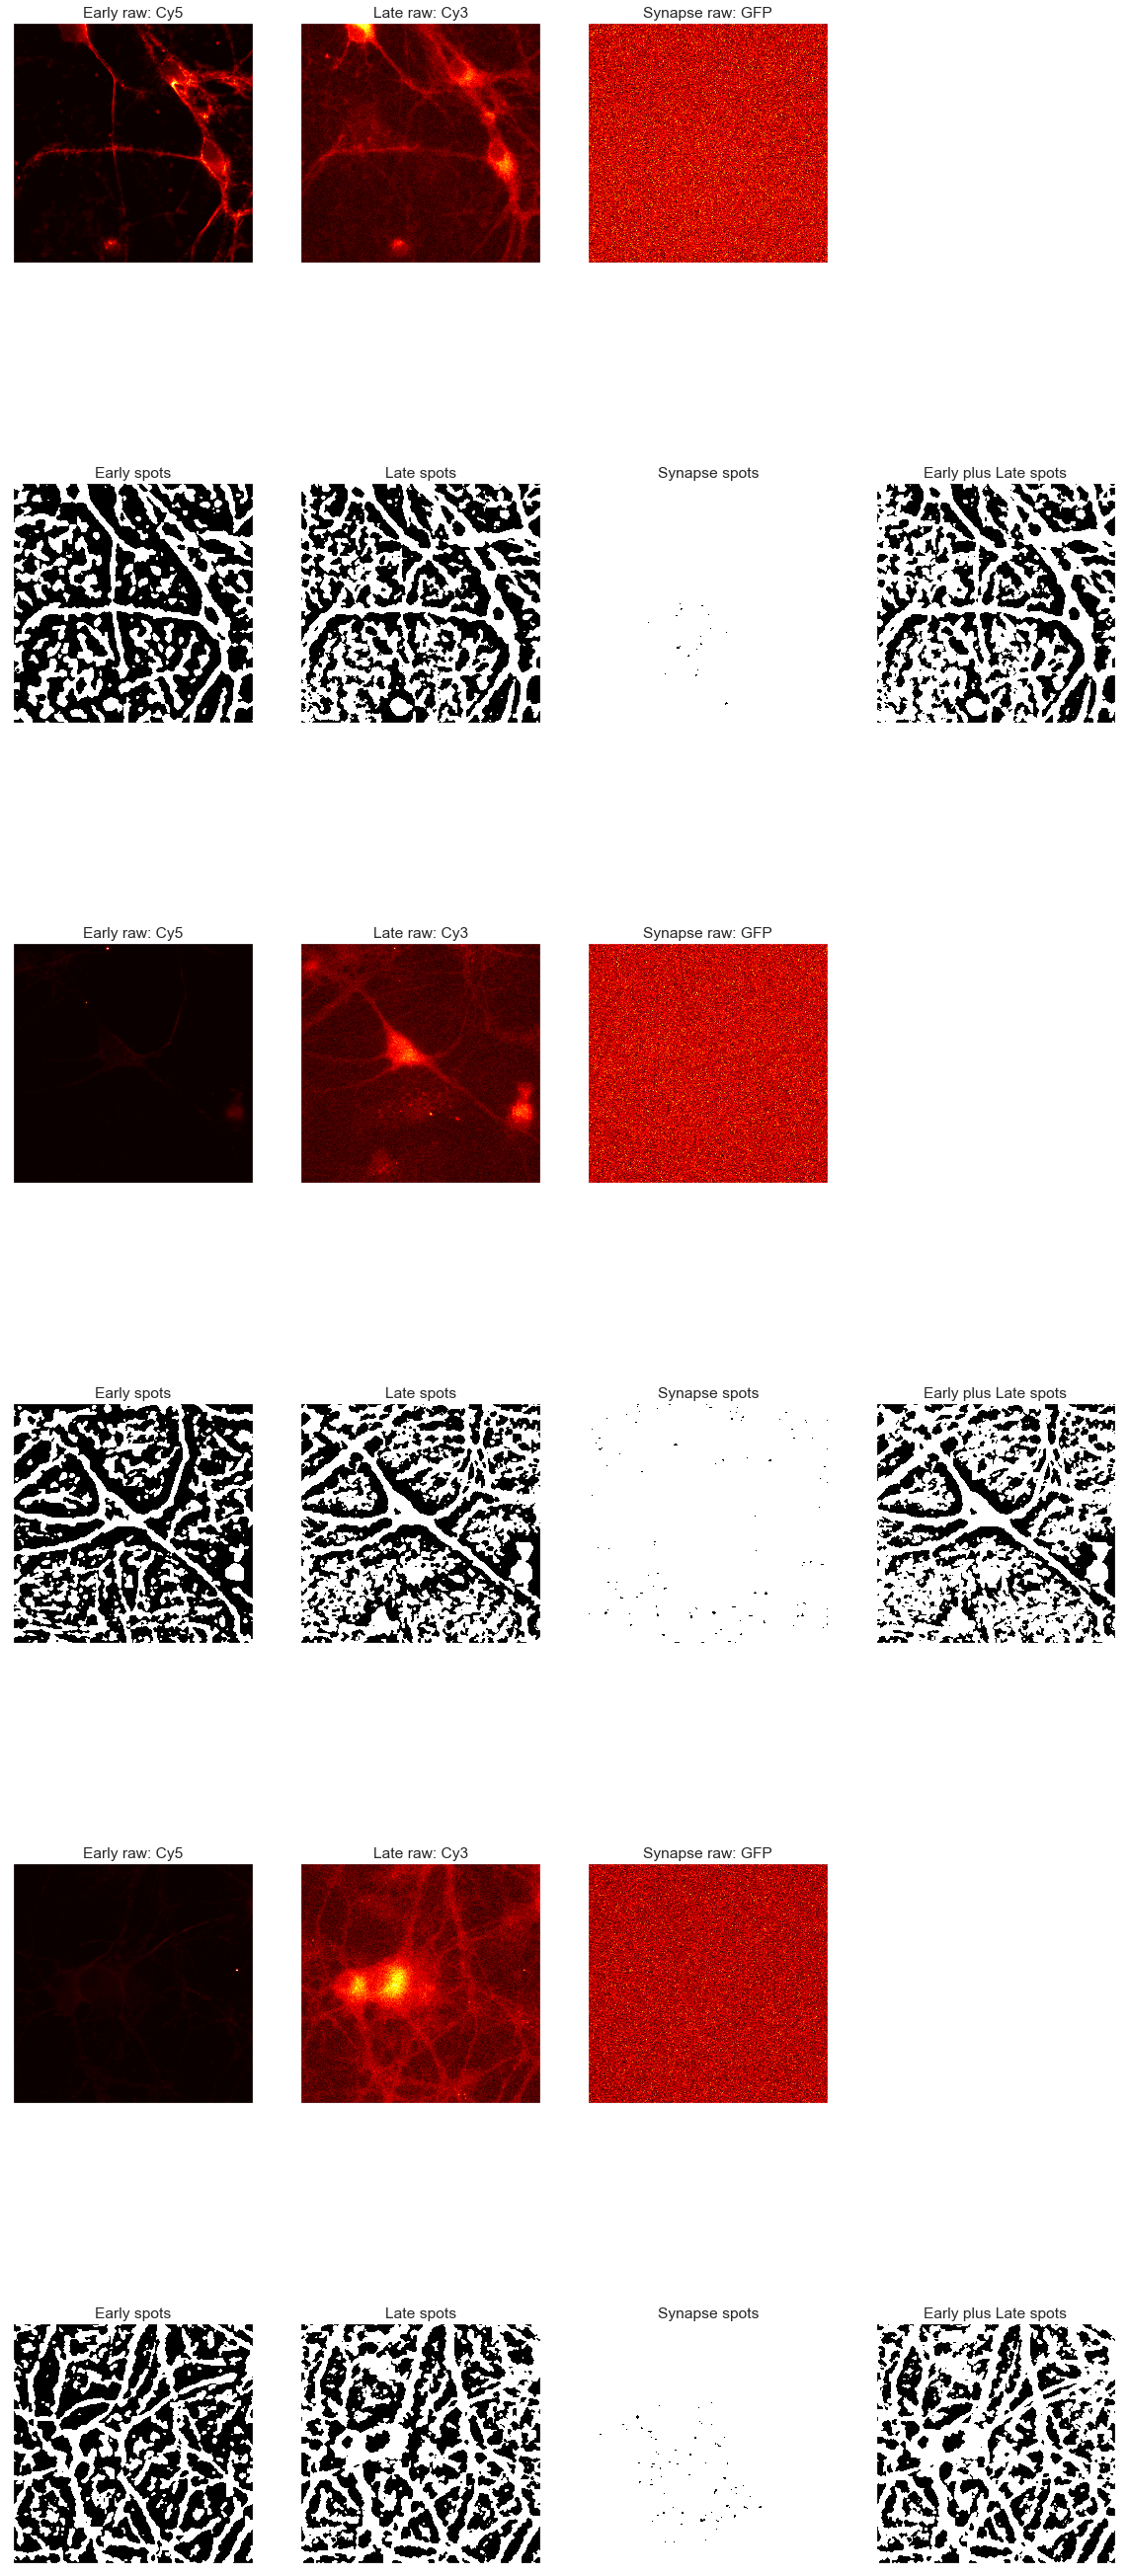

In [57]:
#segmentation trial
fig=plt.figure(figsize=(20,50))
figno=1
for im in range(0,3):
    randomno=np.random.randint(1,len(results["filename"]))
    early_channel_no=1
    late_channel_no=2
    synapse_channel_no=3
    with ND2Reader(results["filename"][randomno]) as images:
        print(results["filename"][randomno])
        early_image=images[early_channel_no-1]
        late_image=images[late_channel_no-1]
        if synapse_channel_no>0:
            synapse_image=images[synapse_channel_no-1]
            [channel1name, channel2name, channel3name]=early_image.metadata['channels']
            if early_channel_no==1:
                early_channelname=channel1name
                if late_channel_no==2:
                    late_channelname=channel2name
                    synapse_channelname=channel3name
                else:
                    late_channelname=channel3name
                    synapse_channelname=channel2name
            if early_channel_no==2:
                early_channelname=channel2name
                if late_channel_no==3:
                    late_channelname=channel3name
                    synapse_channelname=channel1name
                else:
                    late_channelname=channel1name
                    synapse_channelname=channel3name
            if early_channel_no==3:
                early_channelname=channel3name
                if late_channel_no==2:
                    late_channelname=channel2name
                    synapse_channelname=channel1name
                else:
                    late_channelname=channel1name
                    synapse_channelname=channel2name
        else:
            synapse_image=np.zeros((512,512))        
            [channel1name, channel2name]=early_image.metadata['channels']
        if early_channel_no==1:
            early_channelname=channel1name
            late_channelname=channel2name
        else:
            early_channelname=channel2name
            late_channelname=channel1name
            synapse_channelname='No staining'
    #smoothing with gaussian filter for noise reduction
    #can play with sigma
    sigmagauss=2.5 #should be roughly half the size of the object you are detecting
    early_smooth = ndi.filters.gaussian_filter(early_image,sigmagauss)
    late_smooth = ndi.filters.gaussian_filter(late_image,sigmagauss)
    synapse_smooth=ndi.filters.gaussian_filter(synapse_image,sigmagauss)
    #adaptive thresholding - bg found by mean filter with SE
    istruct=51 #for SE
    struct = (np.mgrid[:istruct,:istruct][0] - np.floor(istruct/2))**2 + (np.mgrid[:istruct,:istruct][1] - np.floor(istruct/2))**2 <= np.floor(istruct/2)**2
    bg_early = rank.mean(early_smooth, selem=struct)
    bg_late = rank.mean(late_smooth, selem=struct)
    bg_synapse = rank.mean(synapse_smooth, selem=struct)
    early_spots = early_smooth >= bg_early
    late_spots = late_smooth >= bg_late
    synapse_spots = synapse_smooth >= bg_synapse
    lateplusearly_spots = np.add(late_spots,early_spots)
    lateplusearly_spots[lateplusearly_spots==2]=1
    #improve with binary hole filling
    #early_spots_holes_filled = ndi.binary_fill_holes(np.logical_not(early_spots))
    #late_spots_holes_filled = ndi.binary_fill_holes(np.logical_not(late_spots))
    #improve with binary closing
    #i2 = 3
    #struct2 = (np.mgrid[:i2,:i2][0] - np.floor(i2/2))**2 + (np.mgrid[:i2,:i2][1] - np.floor(i2/2))**2 <= np.floor(i2/2)**2
    #pad_size = i+2 #pad the spots image to avoid artifacts at the edges
    #padded_early_spots = np.pad(early_spots_holes_filled,pad_size,mode='reflect')
    #padded_late_spots = np.pad(late_spots_holes_filled,pad_size,mode='reflect')
    #early_spots_final = ndi.binary_closing(np.logical_not(padded_early_spots),structure=struct2)
    #late_spots_final = ndi.binary_closing(np.logical_not(padded_late_spots),structure=struct2)
    #remove the padding from before
    #early_spots_final = early_spots_final[pad_size:-pad_size,pad_size:-pad_size]
    #late_spots_final = late_spots_final[pad_size:-pad_size,pad_size:-pad_size]
    #figures    
    fig.add_subplot(6,4,figno)
    plt.imshow(early_image,interpolation='none',cmap='hot',vmin=1.5*early_image.min(),vmax=0.95*early_image.max())
    plt.title('Early raw: '+early_channelname)
    ax=plt.gca()
    ax.grid(color='none')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    fig.add_subplot(6,4,figno+1)
    plt.imshow(late_image,interpolation='none',cmap='hot')
    plt.title('Late raw: '+late_channelname)
    ax=plt.gca()
    ax.grid(color='none')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    fig.add_subplot(6,4,figno+2)
    plt.imshow(synapse_image,interpolation='none',cmap='hot')
    plt.title('Synapse raw: '+synapse_channelname)
    ax=plt.gca()
    ax.grid(color='none')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    fig.add_subplot(6,4,figno+4)
    plt.imshow(early_spots,interpolation='none',cmap='gray')
    plt.title('Early spots')
    ax=plt.gca()
    ax.grid(color='none')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    fig.add_subplot(6,4,figno+5)
    plt.imshow(late_spots,interpolation='none',cmap='gray')
    plt.title('Late spots')
    ax=plt.gca()
    ax.grid(color='none')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    fig.add_subplot(6,4,figno+6)
    plt.imshow(synapse_spots,interpolation='none',cmap='gray')
    plt.title('Synapse spots')
    ax=plt.gca()
    ax.grid(color='none')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    fig.add_subplot(6,4,figno+7)
    plt.imshow(lateplusearly_spots,interpolation='none',cmap='gray')
    plt.title('Early plus Late spots')
    ax=plt.gca()
    ax.grid(color='none')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    figno=figno+8 

In [65]:
#segmentation for all images
print('Total number of images: ' + str(len(results['filename'])))

for im in range(0,len(results["filename"])): 
    print('Calculating image no ' + str(im+1) + 'of ' + str(len(results['filename'])))
    early_channel_no=1
    late_channel_no=2
    synapse_channel_no=3
    with ND2Reader(results["filename"][im]) as images:
        early_image=images[early_channel_no-1]
        late_image=images[late_channel_no-1]
        if synapse_channel_no>0:
            synapse_image=images[synapse_channel_no-1]
        else:
            synapse_image=np.zeros((512,512))       
    #smoothing with gaussian filter for noise reduction
    #can play with sigma
    # sigmagauss=3 #taken from previous cell
    early_smooth = ndi.filters.gaussian_filter(early_image,sigmagauss)
    late_smooth = ndi.filters.gaussian_filter(late_image,sigmagauss)
    synapse_smooth = ndi.filters.gaussian_filter(synapse_image,sigmagauss)
    early_image=np.divide(early_image,16383.)
    late_image=np.divide(late_image,16383.)
    synapse_image=np.divide(synapse_image,16383.)
    #adaptive thresholding - bg found by mean filter with SE
    bg_early = rank.mean(early_smooth, selem=struct)
    bg_late = rank.mean(late_smooth, selem=struct)
    bg_synapse = rank.mean(synapse_smooth, selem=struct)
    early_spots = early_smooth >= bg_early
    late_spots = late_smooth >= bg_late
    synapse_spots = synapse_smooth >= bg_synapse
    #improve with binary hole filling
    #early_spots_holes_filled = ndi.binary_fill_holes(np.logical_not(early_spots))
    #late_spots_holes_filled = ndi.binary_fill_holes(np.logical_not(late_spots))
    #improve with binary closing
    #i2 = 3
    #struct2 = (np.mgrid[:i2,:i2][0] - np.floor(i2/2))**2 + (np.mgrid[:i2,:i2][1] - np.floor(i2/2))**2 <= np.floor(i2/2)**2
    #pad_size = i+2 #pad the spots image to avoid artifacts at the edges
    #padded_early_spots = np.pad(early_spots_holes_filled,pad_size,mode='reflect')
    #padded_late_spots = np.pad(late_spots_holes_filled,pad_size,mode='reflect')
    #early_spots_final = ndi.binary_closing(np.logical_not(padded_early_spots),structure=struct2)
    #late_spots_final = ndi.binary_closing(np.logical_not(padded_late_spots),structure=struct2)
    #remove the padding from before
    #early_spots_final = early_spots_final[pad_size:-pad_size,pad_size:-pad_size]
    #late_spots_final = late_spots_final[pad_size:-pad_size,pad_size:-pad_size]
    results["Early colour - spots mask"].append(early_spots)
    results["Late colour - spots mask"].append(late_spots)
    results["Synapse colour - spots mask"].append(synapse_spots)
os.system('say "Segmentation complete"')

Total number of images: 100
Calculating image no 1of 100


/anaconda3/lib/python3.6/site-packages/skimage/filters/rank/generic.py:102: UserWarning: Bitdepth of 11 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)


Calculating image no 2of 100
Calculating image no 3of 100
Calculating image no 4of 100


/anaconda3/lib/python3.6/site-packages/skimage/filters/rank/generic.py:102: UserWarning: Bitdepth of 13 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)


Calculating image no 5of 100
Calculating image no 6of 100
Calculating image no 7of 100
Calculating image no 8of 100


/anaconda3/lib/python3.6/site-packages/skimage/filters/rank/generic.py:102: UserWarning: Bitdepth of 12 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)


Calculating image no 9of 100
Calculating image no 10of 100
Calculating image no 11of 100
Calculating image no 12of 100
Calculating image no 13of 100
Calculating image no 14of 100
Calculating image no 15of 100
Calculating image no 16of 100
Calculating image no 17of 100
Calculating image no 18of 100
Calculating image no 19of 100
Calculating image no 20of 100
Calculating image no 21of 100
Calculating image no 22of 100
Calculating image no 23of 100
Calculating image no 24of 100
Calculating image no 25of 100
Calculating image no 26of 100
Calculating image no 27of 100
Calculating image no 28of 100
Calculating image no 29of 100
Calculating image no 30of 100
Calculating image no 31of 100
Calculating image no 32of 100
Calculating image no 33of 100
Calculating image no 34of 100
Calculating image no 35of 100
Calculating image no 36of 100
Calculating image no 37of 100
Calculating image no 38of 100
Calculating image no 39of 100
Calculating image no 40of 100
Calculating image no 41of 100
Calculating

0

In [59]:
results["earlyctrldir"]

KeyError: 'earlyctrldir'

In [25]:
from copy import deepcopy

In [66]:
#batch analyze
print('Total number of images: ' + str(len(results['filename'])))

for i in range(0,len(results["filename"])): 
    print('Calculating image no ' + str(i+1) + ' out of' + str(len(results["filename"])))
    early_channel_no=1
    late_channel_no=2
    synapse_channel_no=3
    if synapse_channel_no>0:
        synapse_flag=True
        print('has synapse values')
    else:
        synapse_flag=False
    with ND2Reader(results["filename"][i]) as images:
        #read the images
        early_image=images[early_channel_no-1]
        late_image=images[late_channel_no-1]
        if synapse_flag:
            synapse_image=images[synapse_channel_no-1]
    #convert to array
    early_image=early_image.astype(np.int16)
    late_image=late_image.astype(np.int16)
    if synapse_flag:
        synapse_image=synapse_image.astype(np.int16)
    #preserve the raw images
    early_image_raw = deepcopy(early_image)
    late_image_raw=deepcopy(late_image)
    if synapse_flag:
        synapse_image_raw=deepcopy(synapse_image)
    #normalize intensity to value between 0 and 1
    early_image=np.divide(early_image,16383.)
    late_image=np.divide(late_image,16383.)
    if synapse_flag:
        synapse_image=np.divide(synapse_image,16383.)
    #make normalized image;divide each pixel by max in the channel in that image
    early_image_norm=deepcopy(early_image)
    early_image_norm=early_image_norm-np.mean(early_image_norm)
    late_image_norm=deepcopy(late_image)
    late_image_norm=late_image_norm-np.mean(late_image_norm)
    if synapse_flag:
        synapse_image_norm=deepcopy(synapse_image)
        synapse_image_norm=synapse_image_norm-np.mean(synapse_image_norm)
    #small detour to calculate the mean fluorescence of controls - early or late colour alone
    #1- earlycolour
    ctrlearlys={"filename":[]}
    ctrlearly=results["Earlycontroldir"][i]
    pathearly = os.path.dirname(ctrlearly+"/")
    filelistearly = []
    for root, _, filenames in os.walk(pathearly):
         for filename in filenames:
             filelistearly.append(os.path.join(root, filename))
    for l in range(0,len(filelistearly)):
        if filelistearly[l].endswith(".nd2"): 
            ctrlearlys["filename"].append(filelistearly[l])
    earlycolour_ctrls=np.zeros((len(ctrlearlys["filename"]),1))
    for im in range(0,len(ctrlearlys["filename"])):
        with ND2Reader(ctrlearlys["filename"][im]) as images:
            early_image_ctrl=images[early_channel_no-1]
        #convert to array
        early_image_ctrl=early_image_ctrl.astype(np.int16)
        #normalize intensity to value between 0 and 1
        early_image_ctrl=np.divide(early_image_ctrl,16383.)
        #append mean intensity
        earlycolour_ctrls[im]=np.mean(early_image_ctrl)
    #average the vectors
    early_ctrl_mean=np.mean(earlycolour_ctrls)
    #make image normalized to the control
    early_image_normtoctrl=deepcopy(early_image)
    early_image_normtoctrl=np.divide(early_image_normtoctrl,early_ctrl_mean)
               
    #read spots masks
    early_spots=results["Early colour - spots mask"][i]
    late_spots=results["Late colour - spots mask"][i]
    if synapse_flag:
        synapse_spots=results["Synapse colour - spots mask"][i]
    #label the spots
    spots_early_labels,_ = ndi.label(early_spots)
    spots_late_labels,_ = ndi.label(late_spots)
    spots_earlypluslate_labels,_ = ndi.label(lateplusearly_spots)
    if synapse_flag:
        spots_synapse_labels,_ = ndi.label(synapse_spots)

    #calculate results
    #make empty vectors                                   
    early_spots_intensities=np.zeros((len(np.unique(spots_early_labels)),1))
    early_spots_intensities_normtoctrl=np.zeros((len(np.unique(spots_early_labels)),1))
    early_spots_areas=np.zeros((len(np.unique(spots_early_labels)),1))
    late_spots_intensities=np.zeros((len(np.unique(spots_late_labels)),1))
    late_spots_intensities_normtoctrl=np.zeros((len(np.unique(spots_late_labels)),1))
    late_spots_areas=np.zeros((len(np.unique(spots_late_labels)),1))
    if synapse_flag:
        synapse_spots_intensities=np.zeros((len(np.unique(spots_synapse_labels)),1))
        synapse_spots_areas=np.zeros((len(np.unique(spots_synapse_labels)),1))
        early_atsynapses_intensities=np.zeros((len(np.unique(spots_synapse_labels)),1))   
        late_atsynapses_intensities=np.zeros((len(np.unique(spots_synapse_labels)),1)) 
        early_atsynapses_intensities_normtoctrl=np.zeros((len(np.unique(spots_synapse_labels)),1))   
        late_atsynapses_intensities_normtoctrl=np.zeros((len(np.unique(spots_synapse_labels)),1)) 
    #loop over early spots
    print('no early spots = ' +str(len(np.unique(spots_early_labels))))
    for spotno in np.unique(spots_early_labels)[1:]:
        early_spots_mask = spots_early_labels==spotno
        early_spots_intensities[spotno]=np.nanmean(early_image[early_spots_mask])
        early_spots_intensities_normtoctrl[spotno]=np.nanmean(early_image_normtoctrl[early_spots_mask])
        early_spots_areas[spotno]=np.sum(early_spots_mask)
        
    #loop over late spots
    print('no late spots = ' +str(len(np.unique(spots_late_labels))))
    for spotnol in np.unique(spots_late_labels)[1:]:
        late_spots_mask= spots_late_labels==spotnol
        late_spots_intensities[spotnol]=np.nanmean(late_image[late_spots_mask])
        late_spots_areas[spotnol]=np.sum(late_spots_mask)
    #loop over synapse spots   
    if synapse_flag:
        print('no synapse spots = ' +str(len(np.unique(spots_synapse_labels))))
        for spotnos in np.unique(spots_synapse_labels)[1:]:
            synapse_spots_mask= spots_synapse_labels==spotnos
            synapse_spots_intensities[spotnos]=np.nanmean(synapse_image[synapse_spots_mask])
            synapse_spots_areas[spotnos]=np.sum(synapse_spots_mask)
            #intensities masked by synapses, calculation
            early_atsynapses_intensities[spotnos]=np.nanmean(early_image[synapse_spots_mask])
            late_atsynapses_intensities[spotnos]=np.nanmean(late_image[synapse_spots_mask])
            early_atsynapses_intensities_normtoctrl[spotnos]=np.nanmean(early_image_normtoctrl[synapse_spots_mask])
             
    #final results calculation:
    #results based on spot segmentation    
    results["Early colour - Mean intensity of spots"].append(np.nanmean(early_spots_intensities))
    results["Late colour - Mean intensity of spots"].append(np.nanmean(late_spots_intensities))
    results["Early colour - Mean intensity of spots Normd to ctrls"].append(np.nanmean(early_spots_intensities_normtoctrl))
    if synapse_flag:
        results["Synapse colour - Mean intensity of spots"].append(np.nanmean(synapse_spots_intensities))
    else:
        results["Synapse colour - Mean intensity of spots"].append(np.nan) 
    
    #global results
    results["Early colour - Raw mean intensity"].append(np.nanmean(early_image_raw))
    results["Late colour - Raw mean intensity"].append(np.nanmean(late_image_raw))
    results["Early colour - Mean intensity Normd to ctrls"].append(np.nanmean(early_image_normtoctrl))
    if synapse_flag:
        results["Synapse colour - Raw mean intensity"].append(np.nanmean(synapse_image_raw))
    else:
        results["Synapse colour - Raw mean intensity"].append(np.nan)
    
os.system('say "Finished batch analyzing"')

Total number of images: 100
Calculating image no 1 out of100
has synapse values
no early spots = 105
no late spots = 65
no synapse spots = 2
Calculating image no 2 out of100
has synapse values
no early spots = 205
no late spots = 148
no synapse spots = 2
Calculating image no 3 out of100
has synapse values
no early spots = 146
no late spots = 112
no synapse spots = 2
Calculating image no 4 out of100
has synapse values
no early spots = 175
no late spots = 172
no synapse spots = 2
Calculating image no 5 out of100
has synapse values
no early spots = 183
no late spots = 223
no synapse spots = 2
Calculating image no 6 out of100
has synapse values
no early spots = 172
no late spots = 206
no synapse spots = 2
Calculating image no 7 out of100
has synapse values
no early spots = 166
no late spots = 183
no synapse spots = 2
Calculating image no 8 out of100
has synapse values
no early spots = 148
no late spots = 166
no synapse spots = 2
Calculating image no 9 out of100
has synapse values
no early 

0

In [67]:
del results['earlychannelno']
del results['latechannelno']
del results['synapsechannelno']
del results['Autofluorescencedir']

In [68]:
df=pd.DataFrame(results)
df.to_csv(path_or_buf=expdir+'/results.csv')

In [69]:
for item in results.keys():
    print(item,len(results[item]))

filename 100
Earlycontroldir 100
Early colour - Mean intensity of spots Normd to ctrls 100
Early colour - Mean intensity Normd to ctrls 100
exp condition 100
Early colour - spots mask 100
Late colour - spots mask 100
Synapse colour - spots mask 100
Early colour - Raw mean intensity 100
Late colour - Raw mean intensity 100
Synapse colour - Raw mean intensity 100
Early colour - Mean intensity of spots 100
Late colour - Mean intensity of spots 100
Synapse colour - Mean intensity of spots 100


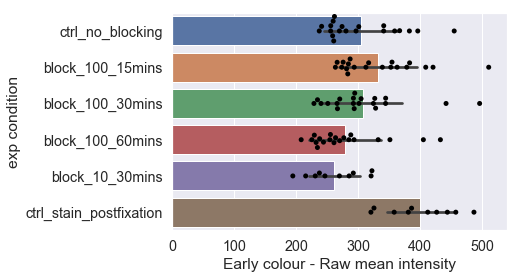

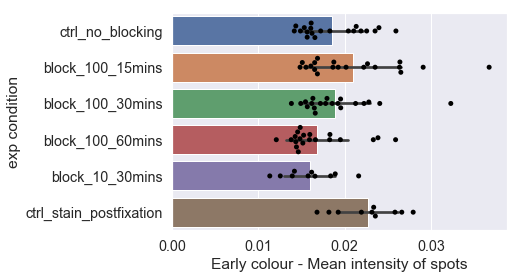

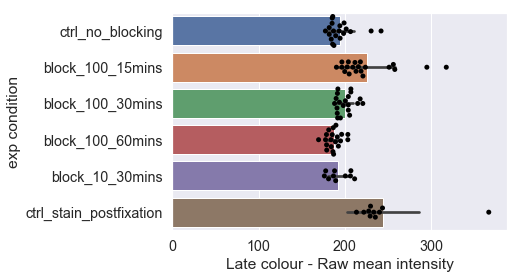

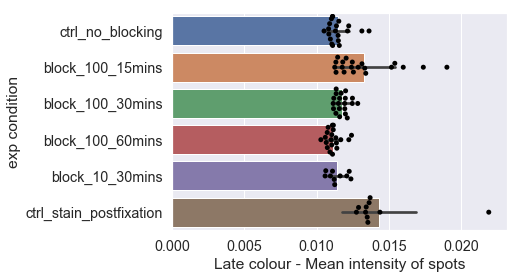

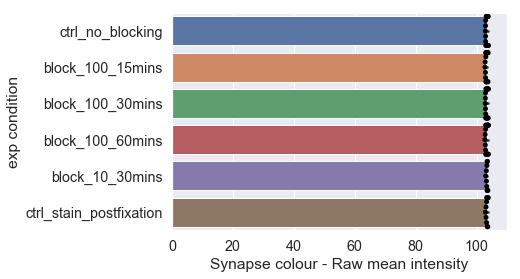

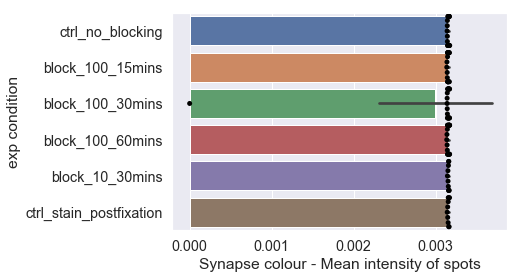

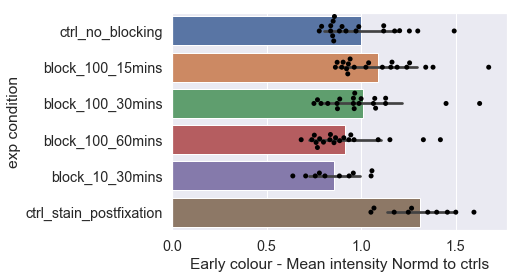

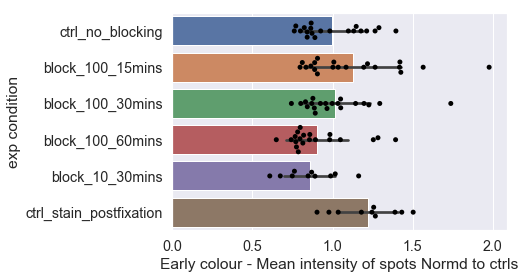

In [71]:
from matplotlib.backends.backend_pdf import PdfPages
def multipage(filename, figs=None, dpi=200):
    pp = PdfPages(filename)
    if figs is None:
        figs = [plt.figure(n) for n in plt.get_fignums()]
    for fig in figs:
        fig.savefig(pp, format='pdf')
    pp.close()
    
sns.set(font_scale=1.3)

fig1=plt.figure()
d=sns.barplot(x="Early colour - Raw mean intensity", y="exp condition",data=df,ci='sd')
d=sns.swarmplot(x="Early colour - Raw mean intensity", y="exp condition",data=df,color='black')
fig1.savefig(expdir+'/results/plot1.png',bbox_inches='tight')

fig3=plt.figure() #
d=sns.barplot(x='Early colour - Mean intensity of spots', y='exp condition',data=df, ci='sd')
d=sns.swarmplot(x="Early colour - Mean intensity of spots", y="exp condition",data=df,color='black')
fig3.savefig(expdir+'/results/plot2.png',bbox_inches='tight')

fig2=plt.figure()
d=sns.barplot(x='Late colour - Raw mean intensity', y='exp condition',data=df, ci='sd')
d=sns.swarmplot(x="Late colour - Raw mean intensity", y="exp condition",data=df,color='black')
fig2.savefig(expdir+'/results/plot3.png',bbox_inches='tight')

fig4=plt.figure() #
d=sns.barplot(x='Late colour - Mean intensity of spots', y='exp condition',data=df, ci='sd')
d=sns.swarmplot(x="Late colour - Mean intensity of spots", y="exp condition",data=df,color='black')
fig4.savefig(expdir+'/results/plot4.png',bbox_inches='tight')

fig2_=plt.figure()
d=sns.barplot(x='Synapse colour - Raw mean intensity', y='exp condition',data=df, ci='sd')
d=sns.swarmplot(x="Synapse colour - Raw mean intensity", y="exp condition",data=df,color='black')
fig2_.savefig(expdir+'/results/plot5.png',bbox_inches='tight')

fig4_=plt.figure() #
d=sns.barplot(x='Synapse colour - Mean intensity of spots', y='exp condition',data=df, ci='sd')
d=sns.swarmplot(x="Synapse colour - Mean intensity of spots", y="exp condition",data=df,color='black')
fig4_.savefig(expdir+'/results/plot6.png',bbox_inches='tight')

fig4_=plt.figure() #
d=sns.barplot(x='Early colour - Mean intensity Normd to ctrls', y='exp condition',data=df, ci='sd')
d=sns.swarmplot(x="Early colour - Mean intensity Normd to ctrls", y="exp condition",data=df,color='black')
fig4_.savefig(expdir+'/results/plot7.png',bbox_inches='tight')

fig4_=plt.figure() #
d=sns.barplot(x='Early colour - Mean intensity of spots Normd to ctrls', y='exp condition',data=df, ci='sd')
d=sns.swarmplot(x="Early colour - Mean intensity of spots Normd to ctrls", y="exp condition",data=df,color='black')
fig4_.savefig(expdir+'/results/plot8.png',bbox_inches='tight')





### Tests for calculation of image entropy

In [89]:
1/150000*10**6

6.666666666666667

In [135]:
import tifffile as tiff
im= tiff.imread('/Users/taldankovich/Desktop/test3.msr - ExpControl Ch1 {0}.tif')
im=im.astype('float')
im[im==0.0]=np.nan
print(im[im==0])

[]


In [98]:
im.shape

(4, 250, 250)

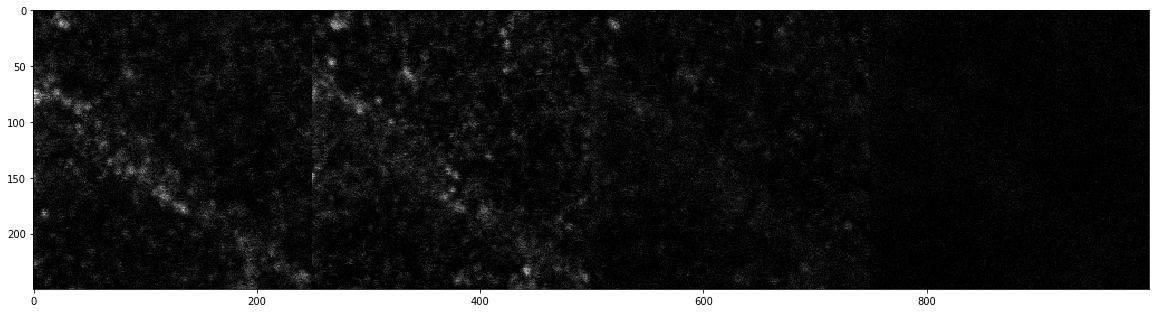

In [136]:
im1=im[0,:,:]
im2=im[1,:,:]
im3=im[2,:,:]
im4=im[3,:,:]
imdisp=np.concatenate([im1,im2,im3,im4],axis=1)
imdisp.shape
plt.figure(figsize=(20,30))
plt.imshow(imdisp,interpolation='none',cmap='gray')
    

In [134]:
print(im2.max())
print(im1.max())

32822.0
32840.0


In [137]:
image_entropy(im1)
image_entropy(im2)
image_entropy(im3)
image_entropy(im4)

8.155752427867833
8.216300953697372
7.74200765725841
7.142159400406519


In [108]:
def image_entropy(image):
    hist = np.bincount(image.ravel().astype(int))+1
    hist=hist/float(np.sum(hist))
    entropy=np.sum(-hist*np.log2(hist))
    print(entropy)

In [2]:
target_array=np.load('/Volumes/ukps-all$/user/tdanko/Python/stack.npy')

In [12]:
target_array=target_array[:,0,:,:,:]

In [13]:
target_array.shape

(2, 5, 500, 500)

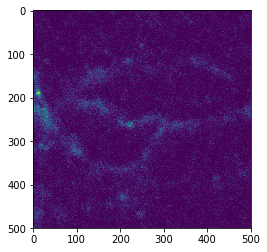

In [17]:
plt.imshow(target_array[0,3,:,:])

In [48]:
def image_entropy(imarray):
    hist = np.bincount(imarray.ravel().astype(int))+1
    hist=hist/float(np.sum(hist))
    entropy=np.sum(-hist*np.log2(hist))
    return np.float(entropy)

In [71]:
highest_entropy=np.float(0.0)
for ni in range(0,5):
    plane=target_array[0,ni,:,:]
    entrop=np.float(image_entropy(plane))
    print('Plane '+str(ni) +'has entropy '+ str(entrop))
    if (entrop > np.float(highest_entropy))==True:
        highest_entropy=entrop
        focalplane=ni-2

Plane 0has entropy 2.974096595215925
Plane 1has entropy 3.2538483714409425
Plane 2has entropy 3.1303857994523923
Plane 3has entropy 2.306635141257829
Plane 4has entropy 1.6087759863051734


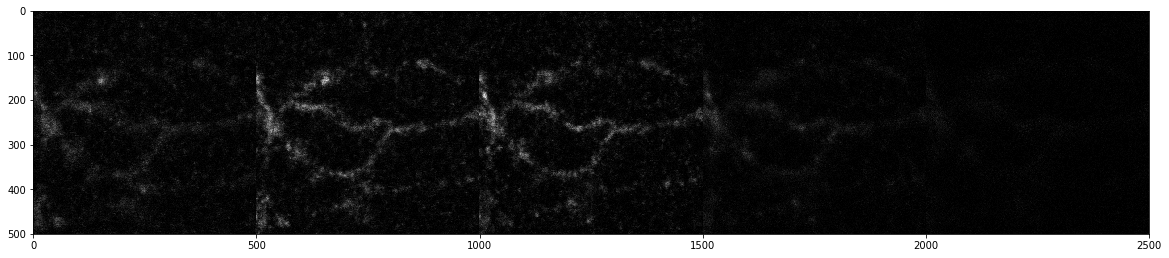

In [64]:
im=target_array
im1=im[0,0,:,:]
im2=im[0,1,:,:]
im3=im[0,2,:,:]
im4=im[0,3,:,:]
im5=im[0,4,:,:]

imdisp=np.concatenate([im1,im2,im3,im4, im5],axis=1)
imdisp.shape
plt.figure(figsize=(20,30))
plt.imshow(imdisp,interpolation='none',cmap='gray')

In [65]:
highest_entropy

3.2538483714409425